In [1]:
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt

1\. PCA on 3D dataset

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [55]:
N = 1000

x1 = np.random.normal(0, 1, N)
x2 = x1 + np.random.normal(0, 3, N)
x3 = 2*x1 + x2

data = np.array((x1, x2, x3))

C = np.cov(data) # data covariance matrix

In [56]:
l, V = la.eig(C) # eigenvalues, eigenvectors (eigendecomposition)

print("Eigendecomposition results:\n")
print("eigenvalues:\n", np.real_if_close(l), '\n')
print("eigenvectors matrix:\n", V, '\n')

Eigendecomposition results:

eigenvalues:
 [2.68619010e+01 7.04046690e-16 1.94932044e+00] 

eigenvectors matrix:
 [[-0.12010019 -0.81649658  0.56472053]
 [-0.57153839 -0.40824829 -0.71181262]
 [-0.81173876  0.40824829  0.41762844]] 



In [57]:
U, S, Vt = la.svd(data)

l_svd = S**2/(N-1)
V_svd = U

print("SVD results:\n")
print("eigenvalues:\n", np.real_if_close(l_svd), '\n')
print("eigenvectors matrix:\n", V_svd, '\n')

SVD results:

eigenvalues:
 [2.68646373e+01 1.95509943e+00 9.54501056e-32] 

eigenvectors matrix:
 [[-0.12001004  0.5647397  -0.81649658]
 [-0.57165201 -0.71172138 -0.40824829]
 [-0.81167209  0.41775801  0.40824829]] 



We can see that the two methods yield the same values for the eigenvectors and the eigenvalues (considering the precision of the machine and that the eigenvectors matrices are equal wrt a permutation of the columns)

In [58]:
x1_v = np.real(l_svd[0]/sum(l_svd))*100
x2_v = np.real(l_svd[1]/sum(l_svd))*100
x3_v = np.real(l_svd[2]/sum(l_svd))*100

print("x1 variability: %.2f%%" % x1_v)
print("x2 variability: %.2f%% " % x2_v)
print("x3 variability: %.2f%% " % x3_v)

print("\nTo retain at least 99% of the total variability, we have to keep both the first and the second component")

x1 variability: 93.22%
x2 variability: 6.78% 
x3 variability: 0.00% 

To retain at least 99% of the total variability, we have to keep both the first and the second component


In [59]:
S[2] = 0

m = U.shape[0]
n = Vt.shape[1]

D = np.zeros((m, n))
for i in range(min(m, n)):
    D[i, i] = S[i]

data_new = np.dot(U, np.dot(D, Vt)) # redefining the data

Text(0.5, 1.0, '$x_1, x_2$ projection')

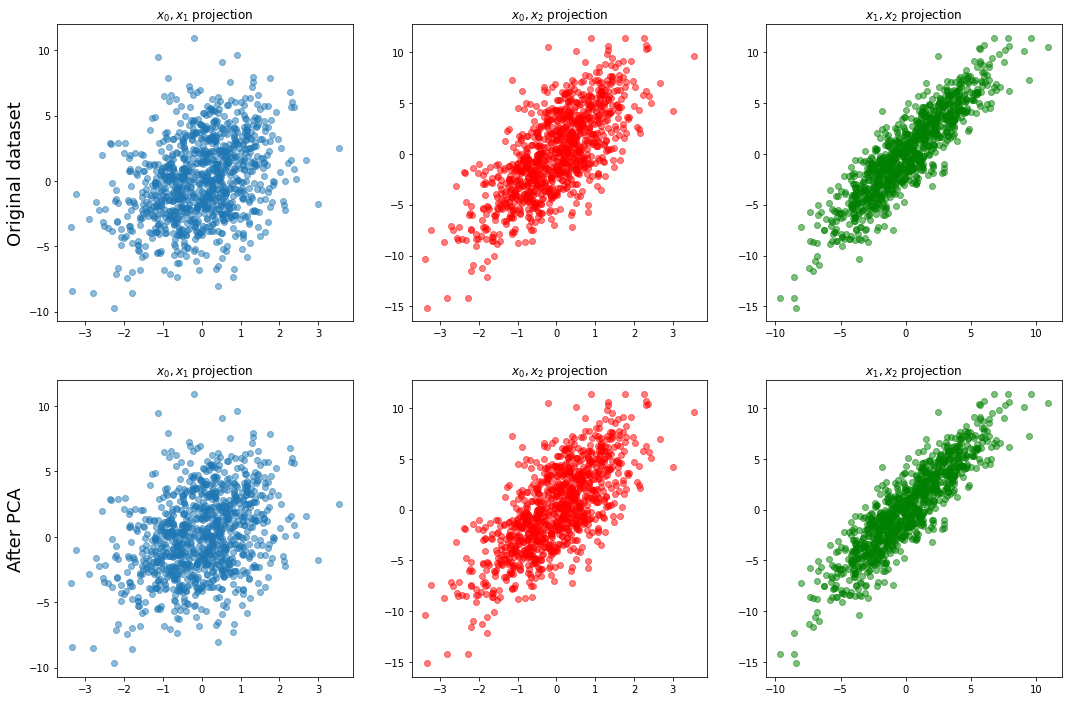

In [60]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(18,12))

ax[0, 0].set_ylabel("Original dataset", fontsize=18)
ax[0, 0].scatter(data[0, :], data[1, :], alpha=.5)
ax[0, 0].set_title("$x_0, x_1$ projection")
ax[0, 1].scatter(data[0, :], data[2, :], alpha=.5, c='r')
ax[0, 1].set_title("$x_0, x_2$ projection")
ax[0, 2].scatter(data[1, :], data[2, :], alpha=.5, c='g')
ax[0, 2].set_title("$x_1, x_2$ projection")

ax[1, 0].set_ylabel("After PCA", fontsize=18)
ax[1, 0].scatter(data_new[0, :], data_new[1, :], alpha=.5)
ax[1, 0].set_title("$x_0, x_1$ projection")
ax[1, 1].scatter(data_new[0, :], data_new[2, :], alpha=.5, c='r')
ax[1, 1].set_title("$x_0, x_2$ projection")
ax[1, 2].scatter(data_new[1, :], data_new[2, :], alpha=.5, c='g')
ax[1, 2].set_title("$x_1, x_2$ projection")


2\. PCA on a nD dataset

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [61]:
noise = np.random.normal(0, 1/20, (10, N))

data = np.vstack((x1, x2, x3, noise))

C = np.cov(data)

In [62]:
l, V = la.eig(C) # eigenvalues, eigenvectors (eigendecomposition)

print("Eigendecomposition results:\n")
print("eigenvalues:\n", np.real_if_close(l), '\n')
print("eigenvectors matrix:\n", V, '\n')

Eigendecomposition results:

eigenvalues:
 [2.68619186e+01 1.94934414e+00 2.32698324e-15 3.07006080e-03
 2.89631074e-03 2.13639732e-03 2.26930657e-03 2.34007184e-03
 2.41321306e-03 2.50445572e-03 2.56988808e-03 2.67271897e-03
 2.63440794e-03] 

eigenvectors matrix:
 [[-1.20100221e-01 -5.64716879e-01 -8.16496581e-01  1.54531418e-03
   1.96903859e-04 -1.17096898e-04  2.59356949e-04 -8.09519828e-04
   1.04169152e-04 -7.99067393e-04  5.46857228e-04  7.49032219e-05
  -5.13727402e-06]
 [-5.71538107e-01  7.11809302e-01 -4.08248290e-01 -1.63005609e-03
  -1.48662755e-04 -7.05676541e-05 -2.65107675e-04  9.91294573e-04
  -4.63772622e-05  8.67247746e-04 -6.36425366e-04 -9.56053193e-07
   3.82252465e-04]
 [-8.11738550e-01 -4.17624455e-01  4.08248290e-01  1.46057227e-03
   2.45144962e-04 -3.04761451e-04  2.53606223e-04 -6.27745082e-04
   1.61961042e-04 -7.30887040e-04  4.57289091e-04  1.48850391e-04
   3.71977916e-04]
 [-3.57273765e-05  2.62378614e-04 -1.03692637e-16  3.53391210e-01
  -5.11271177e-0

In [63]:
U, S, Vt = la.svd(data)

l_svd = S**2/(N-1)
V_svd = U


print("SVD results:\n")
print("eigenvalues:\n", np.real_if_close(l_svd), '\n')
print("eigenvectors matrix:\n", V_svd, '\n')

SVD results:

eigenvalues:
 [2.68646549e+01 1.95512311e+00 3.07006161e-03 2.89637033e-03
 2.67288807e-03 2.63442182e-03 2.57163457e-03 2.50613531e-03
 2.41369506e-03 2.34039711e-03 2.27806803e-03 2.13895058e-03
 2.11026003e-31] 

eigenvectors matrix:
 [[-1.20010074e-01  5.64736056e-01 -1.54474379e-03  1.92130814e-04
  -6.96026420e-05  4.18815394e-06 -5.30886854e-04  7.47774739e-04
  -6.88074618e-05 -8.35882078e-04  3.29286623e-04  1.45566506e-04
  -8.16496581e-01]
 [-5.71651726e-01 -7.11718085e-01  1.62929580e-03 -1.42313441e-04
  -6.11660259e-06 -3.80843974e-04  6.12022708e-04 -8.03788488e-04
   4.52231483e-06  1.02141918e-03 -3.46322619e-04  3.14568198e-05
  -4.08248290e-01]
 [-8.11671875e-01  4.17754027e-01 -1.46019177e-03  2.41948188e-04
  -1.45321887e-04 -3.72467666e-04 -4.49750999e-04  6.91760990e-04
  -1.33092609e-04 -6.50344978e-04  3.12250626e-04  3.22589831e-04
   4.08248290e-01]
 [-3.35496253e-05 -2.18008322e-04 -3.53423327e-01 -5.10646283e-01
  -3.75456738e-01  2.07786825e-

In [64]:
for i in range(data.shape[0]):
  xi_v = np.real(l_svd[i]/sum(l_svd))*100
  print("x{} variability: {:.2f}%".format(i, xi_v))  

print("\nTo retain at least 99% of the total variability, we have to keep both the first and the second component")

x0 variability: 93.13%
x1 variability: 6.78%
x2 variability: 0.01%
x3 variability: 0.01%
x4 variability: 0.01%
x5 variability: 0.01%
x6 variability: 0.01%
x7 variability: 0.01%
x8 variability: 0.01%
x9 variability: 0.01%
x10 variability: 0.01%
x11 variability: 0.01%
x12 variability: 0.00%

To retain at least 99% of the total variability, we have to keep both the first and the second component


In [65]:
S[2:] = 0

m = U.shape[0]
n = Vt.shape[1]

D = np.zeros((m, n))
for i in range(min(m, n)):
    D[i, i] = S[i]

data_new = np.dot(U, np.dot(D, Vt)) # redefining the data

Text(0.5, 1.0, '$x_1, x_2$ projection')

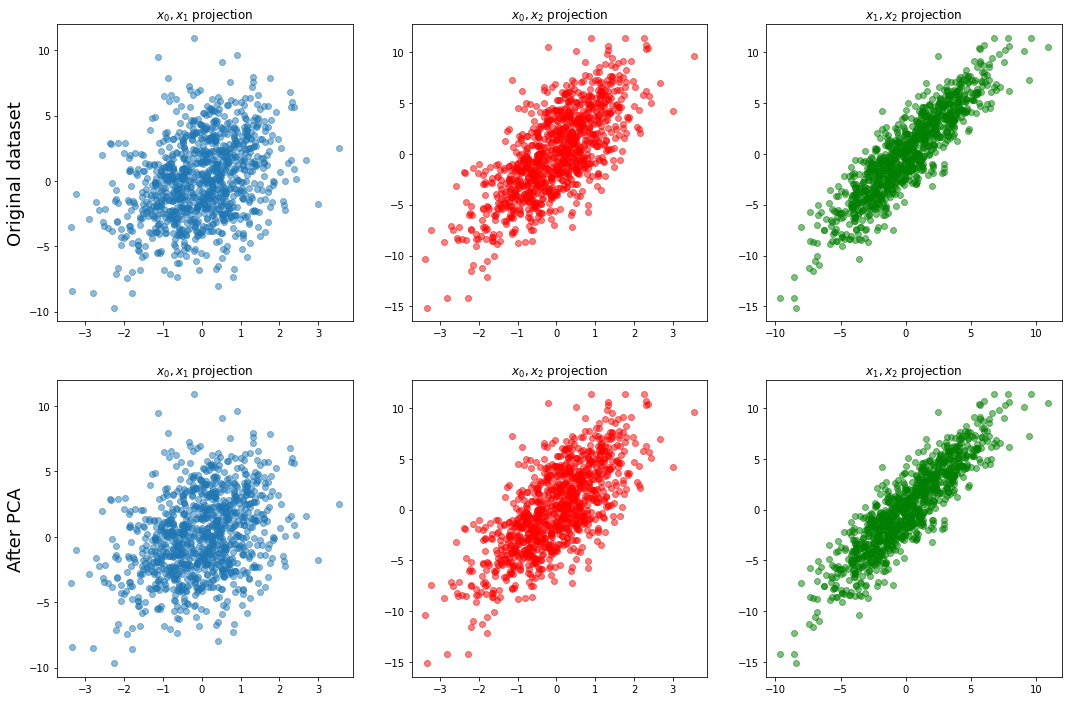

In [66]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(18,12))

ax[0, 0].set_ylabel("Original dataset", fontsize=18)
ax[0, 0].scatter(data[0, :], data[1, :], alpha=.5)
ax[0, 0].set_title("$x_0, x_1$ projection")
ax[0, 1].scatter(data[0, :], data[2, :], alpha=.5, c='r')
ax[0, 1].set_title("$x_0, x_2$ projection")
ax[0, 2].scatter(data[1, :], data[2, :], alpha=.5, c='g')
ax[0, 2].set_title("$x_1, x_2$ projection")

ax[1, 0].set_ylabel("After PCA", fontsize=18)
ax[1, 0].scatter(data_new[0, :], data_new[1, :], alpha=.5)
ax[1, 0].set_title("$x_0, x_1$ projection")
ax[1, 1].scatter(data_new[0, :], data_new[2, :], alpha=.5, c='r')
ax[1, 1].set_title("$x_0, x_2$ projection")
ax[1, 2].scatter(data_new[1, :], data_new[2, :], alpha=.5, c='g')
ax[1, 2].set_title("$x_1, x_2$ projection")


3\. **Optional**: PCA on the MAGIC dataset

Perform a PCA on the magic04.data dataset.

In [67]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 

In [3]:
import pandas as pd
names = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'Class']
df = pd.read_csv('data/magic04.data', names=names)

# we would like to work with a matrix instead of a dataframe to take advantage of numpy methods. In order to do so, since
# elements of an array can be of the same type only (and here 'Class' feature are strings), we map g -> float(0) and h -> float(1)
# without loss of generality, since there are only these two categories
df.loc[df['Class'] == 'g', 'Class'] = 0
df.loc[df['Class'] == 'h', 'Class'] = 1

df = df.drop('Class', axis=1)
df = df - df.mean(axis=0)
data = df.T # centering around mean

N = data.shape[1]
C = np.cov(data)

In [88]:
l, V = la.eig(C) # eigenvalues, eigenvectors (eigendecomposition)

print("Eigendecomposition results:\n")
print("eigenvalues:\n", np.real_if_close(l), '\n')
print("eigenvectors matrix:\n", V, '\n')

In [4]:
U, S, Vt = la.svd(data)

l_svd = S**2/(N-1)
V_svd = U


print("SVD results:\n")
print("eigenvalues:\n", np.real_if_close(l_svd), '\n')
print("eigenvectors matrix:\n", V_svd, '\n')

SVD results:

eigenvalues:
 [6.57979140e+03 3.85387048e+03 2.01638313e+03 1.32675968e+03
 6.10187259e+02 4.33599171e+02 1.17330074e+02 8.63965822e-02
 1.07363851e-02 3.85322859e-04] 

eigenvectors matrix:
 [[-3.27812305e-01 -1.34406332e-01 -6.55078481e-02 -8.63988253e-01
  -9.45511967e-02 -1.98552026e-02  3.38166662e-01 -3.99907112e-03
  -4.54836725e-04 -4.57080123e-05]
 [-1.13810001e-01 -5.38837224e-02  1.89938175e-02 -3.19766485e-01
   1.97548493e-02  2.32592322e-02 -9.38307839e-01 -1.33847863e-02
   6.74902809e-04  5.73158422e-05]
 [-3.06076690e-03  6.59372017e-04 -1.05931761e-03 -6.93028658e-03
  -2.65185255e-03  1.33441545e-04 -1.08823228e-02  9.27765187e-01
  -3.72229862e-01 -2.26331399e-02]
 [ 9.27109146e-04 -2.58205308e-04  5.10399700e-04  2.60555110e-03
   1.53899865e-03 -3.46437681e-05  3.06287144e-03 -3.22020557e-01
  -7.69222364e-01 -5.51887659e-01]
 [ 5.21882399e-04 -1.52710005e-04  2.94635944e-04  1.51275933e-03
   9.19340567e-04 -2.21501607e-05  1.81386903e-03 -1.8800179

In [5]:
tot_var = 0
for i in range(data.shape[0]):
  xi_v = np.real(l_svd[i]/sum(l_svd))*100
  print("x{} variability: {:.2f}%".format(i, xi_v))
  if i < 3:
    tot_var += xi_v  

print("\nWith the first three components, we reach {:.2f}% of the total variability".format(tot_var))

x0 variability: 44.05%
x1 variability: 25.80%
x2 variability: 13.50%
x3 variability: 8.88%
x4 variability: 4.08%
x5 variability: 2.90%
x6 variability: 0.79%
x7 variability: 0.00%
x8 variability: 0.00%
x9 variability: 0.00%

With the first three components, we reach 83.34% of the total variability


In [6]:
S[2:] = 0

m = U.shape[0]
n = Vt.shape[1]

D = np.zeros((m, n))
for i in range(min(m, n)):
    D[i, i] = S[i]

data_new = np.dot(U, np.dot(D, Vt)) # redefining the data

In [12]:
data

array([[-2.44534539e+01, -2.16465539e+01,  1.08801846e+02, ...,
         2.21953461e+01,  6.72633461e+01,  1.33931246e+02],
       [-6.17886622e+00, -1.04574662e+01,  1.13850034e+02, ...,
         2.53495338e+01,  5.47208338e+01,  3.08204338e+01],
       [-1.80116961e-01, -3.06516961e-01,  1.23618304e+00, ...,
         6.23283039e-01,  1.16888304e+00,  3.84283039e-01],
       ...,
       [-8.45242596e+00, -1.02071260e+01, -4.54657260e+01, ...,
        -9.71592596e+00, -6.40886260e+01,  3.12257740e+01],
       [ 1.24462933e+01, -2.12848067e+01,  4.93142933e+01, ...,
         2.65299332e+00,  5.70416933e+01,  2.50852933e+01],
       [-1.11935226e+02,  1.14429735e+01,  6.29699735e+01, ...,
         6.26985735e+01,  2.14498574e+02,  7.84993735e+01]])

Text(0.5, 1.0, '$x_1, x_2$ projection')

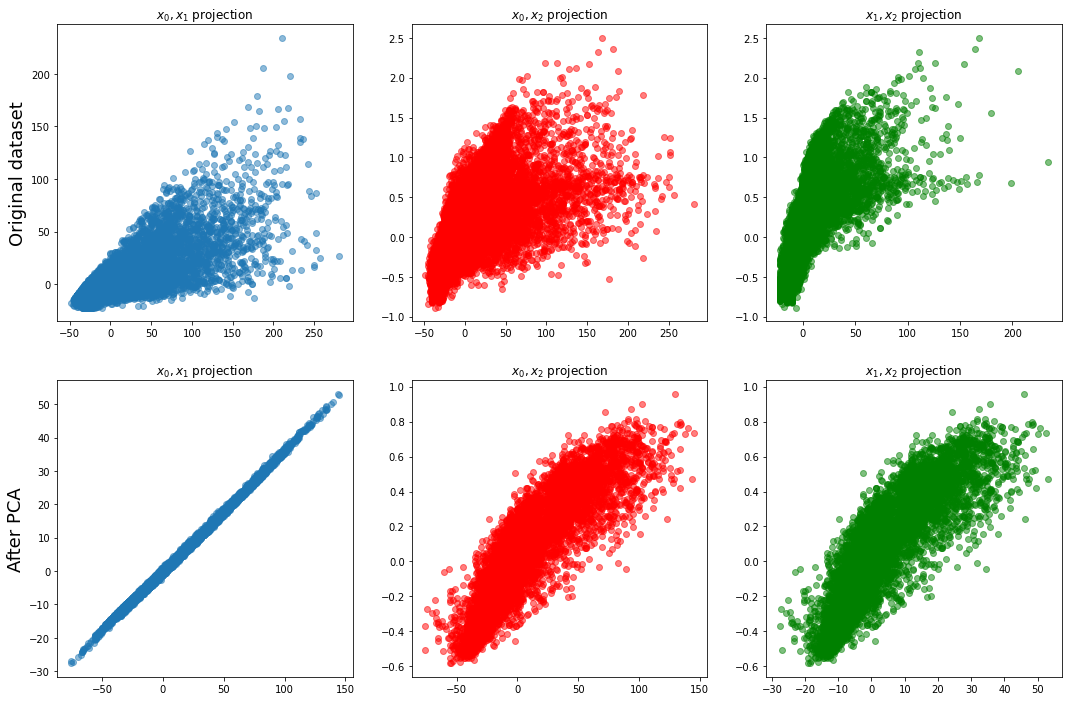

In [14]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(18,12))

ax[0, 0].set_ylabel("Original dataset", fontsize=18)
ax[0, 0].scatter(data[0, :], data[1, :], alpha=.5)
ax[0, 0].set_title("$x_0, x_1$ projection")
ax[0, 1].scatter(data[0, :], data[2, :], alpha=.5, c='r')
ax[0, 1].set_title("$x_0, x_2$ projection")
ax[0, 2].scatter(data[1, :], data[2, :], alpha=.5, c='g')
ax[0, 2].set_title("$x_1, x_2$ projection")

ax[1, 0].set_ylabel("After PCA", fontsize=18)
ax[1, 0].scatter(data_new[0, :], data_new[1, :], alpha=.5)
ax[1, 0].set_title("$x_0, x_1$ projection")
ax[1, 1].scatter(data_new[0, :], data_new[2, :], alpha=.5, c='r')
ax[1, 1].set_title("$x_0, x_2$ projection")
ax[1, 2].scatter(data_new[1, :], data_new[2, :], alpha=.5, c='g')
ax[1, 2].set_title("$x_1, x_2$ projection")
